In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

df = pd.read_csv('loan.csv', sep=',')
df.head()

/var/folders/_p/l2hq10612h35xnw7k6f17qsm0000gq/T/ipykernel_44270/174641395.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv', sep=',')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [75]:
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [76]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [77]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [78]:
#removing null columns from data
df.dropna(axis = 1, how = 'all', inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [79]:
#columns which are irrelevant for us in analysis
#print(df.columns)
df.drop(['id', 'member_id', 'url', 'title', 'emp_title', 'zip_code', 'last_credit_pull_d', 'addr_state','desc','out_prncp_inv','total_pymnt_inv','funded_amnt', 'delinq_2yrs', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d' , 'chargeoff_within_12_mths', 'mths_since_last_delinq', 'mths_since_last_record', 'pymnt_plan', 'tax_liens', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies'], axis = 1, inplace = True)

df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,policy_code,application_type,acc_now_delinq,delinq_amnt
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,1,3,0,83.70%,9,f,1,INDIVIDUAL,0,0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,5,3,0,9.40%,4,f,1,INDIVIDUAL,0,0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,2,2,0,98.50%,10,f,1,INDIVIDUAL,0,0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,1,10,0,21%,37,f,1,INDIVIDUAL,0,0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,0,15,0,53.90%,38,f,1,INDIVIDUAL,0,0


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.00,15000.00,35000.00
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.00,14400.00,35000.00
installment,39717.0,324.561922,208.874874,15.69,167.02,280.22,430.78,1305.19
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.00,82300.00,6000000.00
dti,39717.0,13.315130,6.678594,0.00,8.17,13.40,18.60,29.99
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.00,1.00,8.00
open_acc,39717.0,9.294408,4.400282,2.00,6.00,9.00,12.00,44.00
pub_rec,39717.0,0.055065,0.237200,0.00,0.00,0.00,0.00,4.00
total_acc,39717.0,22.088828,11.401709,2.00,13.00,20.00,29.00,90.00
policy_code,39717.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00


In [81]:
df.shape

(39717, 26)

In [82]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [83]:
df = df[df.loan_status != 'Current']

In [84]:
### convert categorical variable to numerical variable
laonstatus = {'Fully Paid':0,'Charged Off':1}
df['loan_status']=df['loan_status'].map(laonstatus)

In [85]:
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [86]:
(df.isna().sum()/len(df.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
initial_list_status    0.000000
policy_code            0.000000
application_type       0.000000
acc_now_delinq         0.000000
delinq_amnt            0.000000
dtype: float64

In [87]:
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)
df.emp_length.isna().sum()

0

In [88]:
df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
df.revol_util.isna().sum()

0

In [89]:
df.revol_util = pd.to_numeric(df.revol_util.apply(lambda x : x.split('%')[0]))
df.int_rate = pd.to_numeric(df.int_rate.apply(lambda x : x.split('%')[0]))
df.emp_length = pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,policy_code,application_type,acc_now_delinq,delinq_amnt
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,1,3,0,83.7,9,f,1,INDIVIDUAL,0,0
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,5,3,0,9.4,4,f,1,INDIVIDUAL,0,0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,2,2,0,98.5,10,f,1,INDIVIDUAL,0,0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,1,10,0,21.0,37,f,1,INDIVIDUAL,0,0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,3,9,0,28.3,12,f,1,INDIVIDUAL,0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f92011ab070>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92011ab610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f92011b9d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f92011abbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f92011abe80>],
 'means': []}

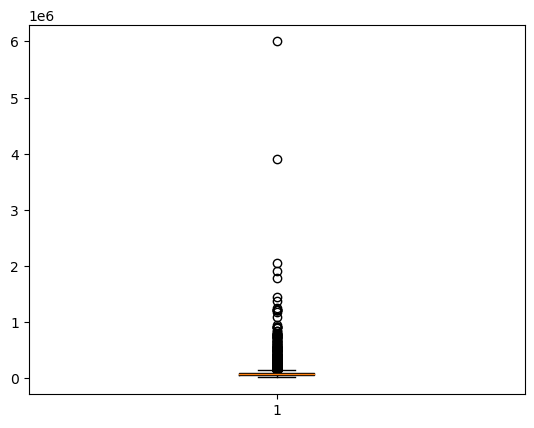

In [90]:
plot.boxplot(df.annual_inc)

In [91]:
quantile = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [92]:
#only considering quantile values which are less 0.95
value_quant_at_95 = df.annual_inc.quantile(0.95)
df = df[df.annual_inc <= value_quant_at_95]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91d3857ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91d3860280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91d38579d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f91d3860820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91d3860af0>],
 'means': []}

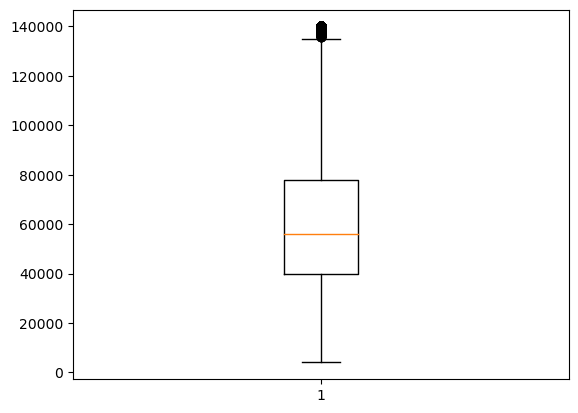

In [93]:
plot.boxplot(df.annual_inc)

<h1>Checking all the other possible outliers</h1>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91dda8fc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91dda9b250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91dda8f9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f91dda9b7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91dda9bac0>],
 'means': []}

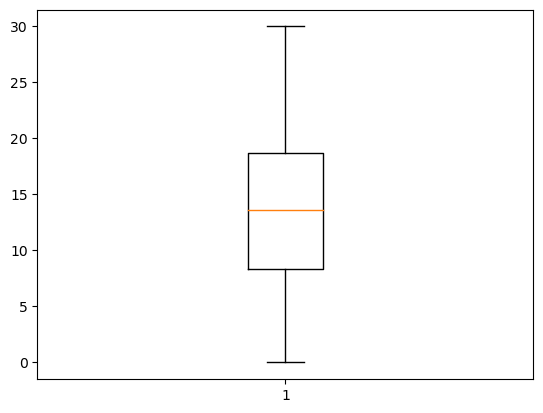

In [94]:
plot.boxplot(df.dti)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91c1f5e190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91c1f5e730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91e37b6e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f91c1f5ecd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91c1f5efa0>],
 'means': []}

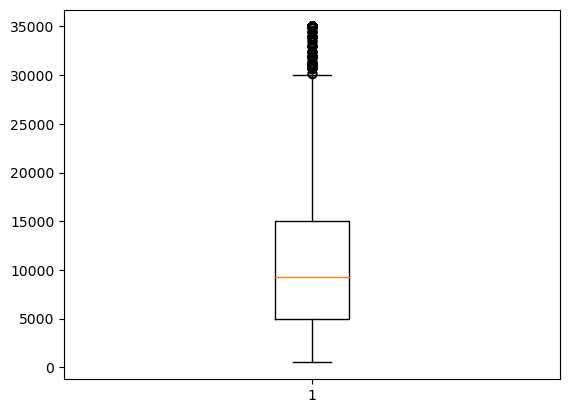

In [95]:
plot.boxplot(df.loan_amnt)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91e3953f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91e39614f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91e3953c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f91e3961a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91e3961d60>],
 'means': []}

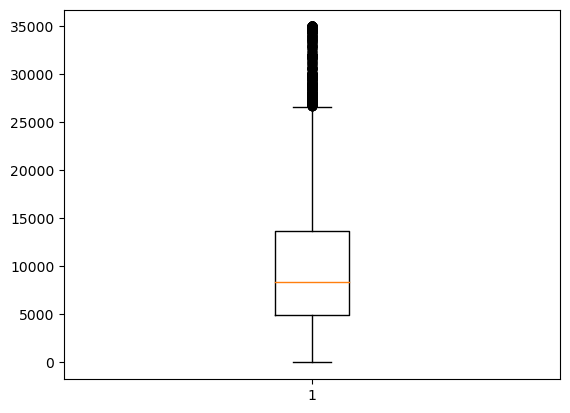

In [96]:
plot.boxplot(df.funded_amnt_inv)

# Univariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

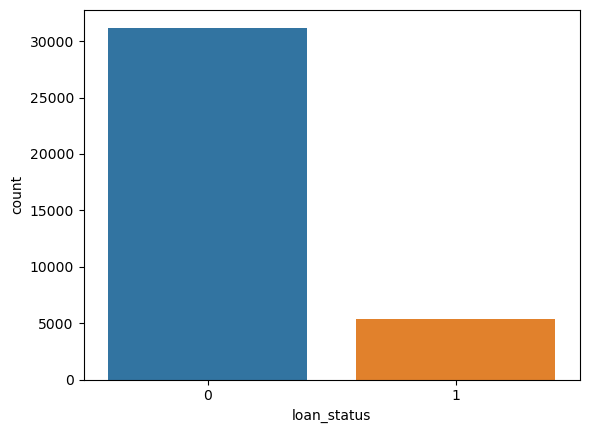

In [97]:
sns.countplot(x = 'loan_status', data=df)

In [98]:
df.home_ownership.replace(to_replace = ['NONE'],value='OTHER',inplace = True)
print(df.home_ownership.unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

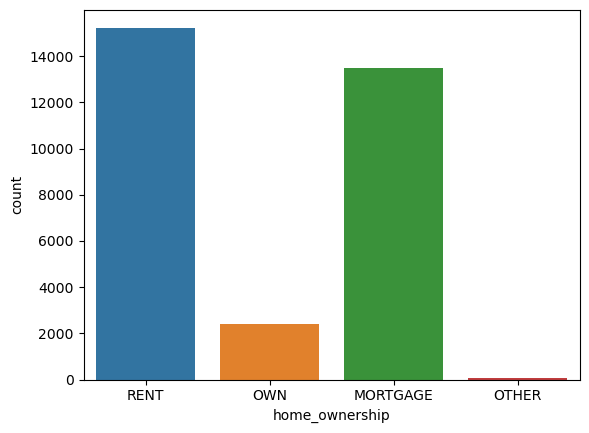

In [99]:
sns.countplot(x='home_ownership', data=df[df.loan_status==0])


<AxesSubplot:xlabel='emp_length', ylabel='count'>

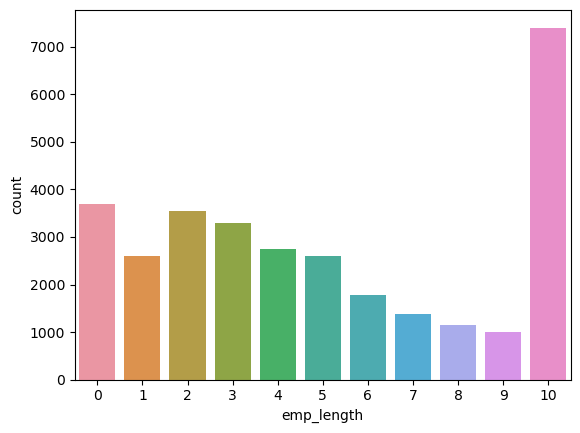

In [100]:
sns.countplot(x='emp_length', data=df[df.loan_status==0])


<AxesSubplot:>

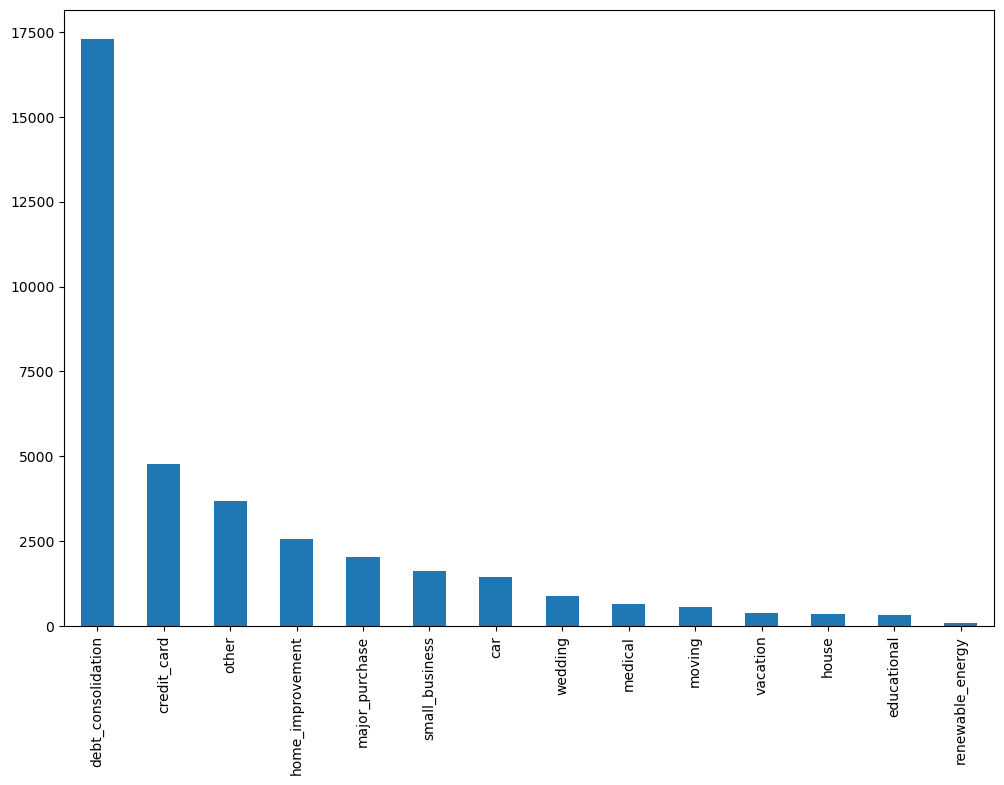

In [102]:
fig, ax = plot.subplots(figsize = (12,8))
df.purpose.value_counts().plot(kind = 'bar', ax = ax)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

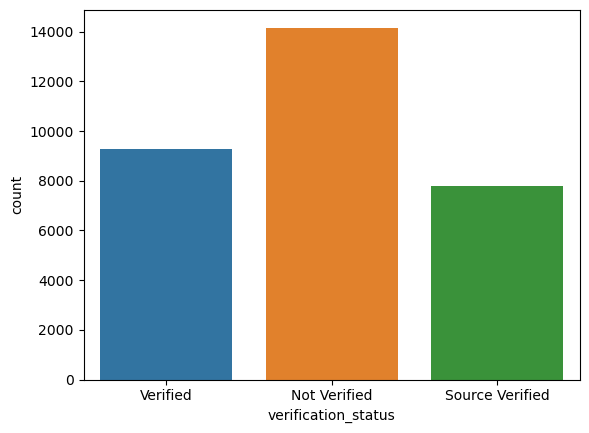

In [103]:
sns.countplot(x = 'verification_status', data=df[df.loan_status == 0])

<AxesSubplot:>

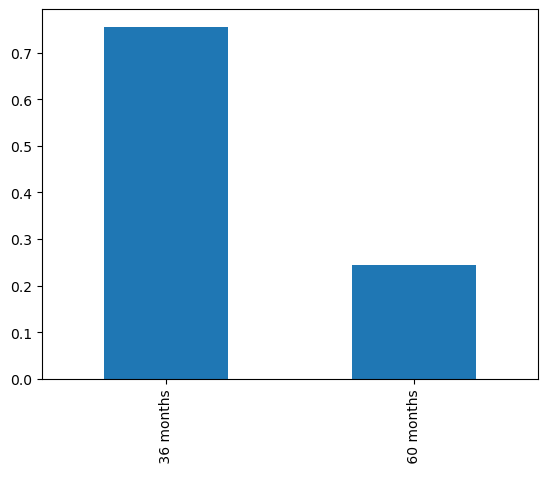

In [104]:
(df.term.value_counts()/len(df)).plot.bar()

(array([ 690., 1688., 2430., 2458., 3314., 3003., 2420., 2515., 2116.,
        2707., 1953., 1818., 1238., 1069., 1275., 1098.,  703.,  571.,
         508.,  488.,  577.,  281.,  183.,  219.,  346.,  257.,  260.,
         122.,   81.,   46.,   24.,   12.,   22.,   42.,   17.,   14.,
          10.,   12.,   15.,    4.]),
 array([  15.69  ,   47.9275,   80.165 ,  112.4025,  144.64  ,  176.8775,
         209.115 ,  241.3525,  273.59  ,  305.8275,  338.065 ,  370.3025,
         402.54  ,  434.7775,  467.015 ,  499.2525,  531.49  ,  563.7275,
         595.965 ,  628.2025,  660.44  ,  692.6775,  724.915 ,  757.1525,
         789.39  ,  821.6275,  853.865 ,  886.1025,  918.34  ,  950.5775,
         982.815 , 1015.0525, 1047.29  , 1079.5275, 1111.765 , 1144.0025,
        1176.24  , 1208.4775, 1240.715 , 1272.9525, 1305.19  ]),
 <BarContainer object of 40 artists>)

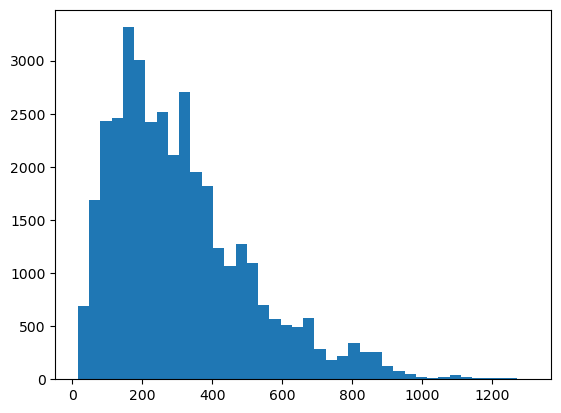

In [105]:
plot.hist(df.installment, bins=40)

# Derived Metrics

In [106]:
df_month_year = df['issue_d'].str.partition("-", True)     
df['issue_month']=df_month_year[0]                       
df['issue_year']='20' + df_month_year[2]

In [107]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,initial_list_status,policy_code,application_type,acc_now_delinq,delinq_amnt,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,0,83.7,9,f,1,INDIVIDUAL,0,0,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,0,9.4,4,f,1,INDIVIDUAL,0,0,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,0,98.5,10,f,1,INDIVIDUAL,0,0,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,0,21.0,37,f,1,INDIVIDUAL,0,0,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,0,28.3,12,f,1,INDIVIDUAL,0,0,Dec,2011


In [108]:
df['installment_groups'] = pd.cut(df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df['funded_amnt_inv_group'] = pd.cut(df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['dti_groups'] = pd.cut(df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,policy_code,application_type,acc_now_delinq,delinq_amnt,issue_month,issue_year,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,1,INDIVIDUAL,0,0,Dec,2011,145-274,0-5k,0-5k,24-30
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,1,INDIVIDUAL,0,0,Dec,2011,14-145,0-5k,0-5k,0-6
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,1,INDIVIDUAL,0,0,Dec,2011,14-145,0-5k,0-5k,6-12
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,1,INDIVIDUAL,0,0,Dec,2011,274-403,5k-10k,5k-10k,18-24
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,1,INDIVIDUAL,0,0,Dec,2011,145-274,0-5k,0-5k,6-12


<h3>Analyzing All the Derived Columns from above</h3>

<AxesSubplot:xlabel='issue_year', ylabel='count'>

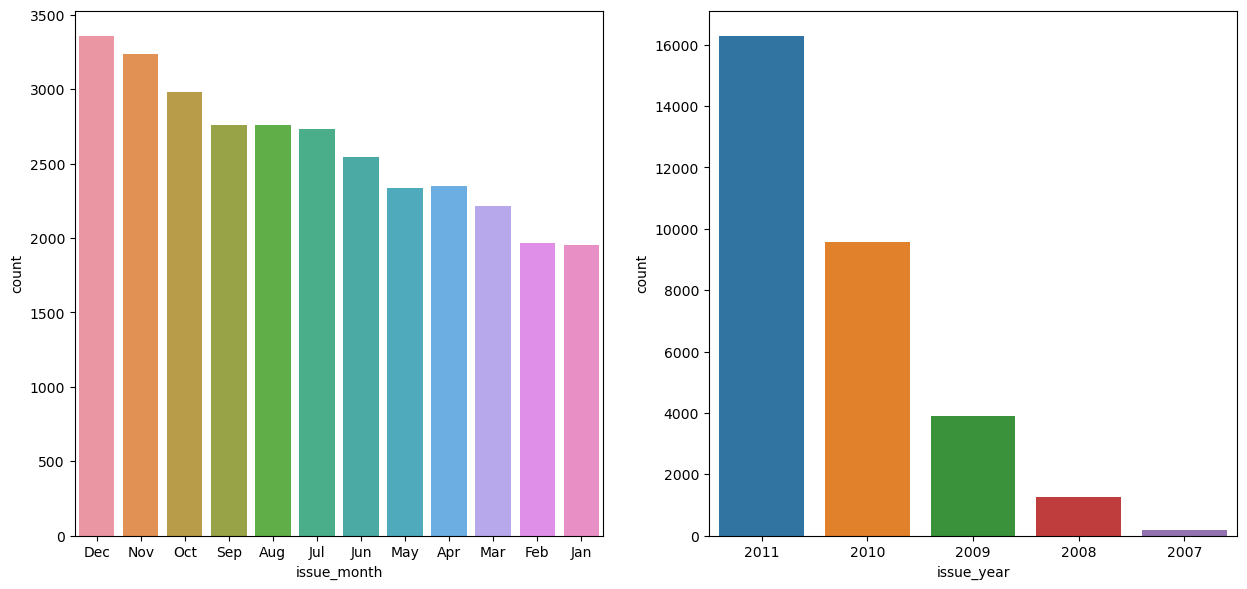

In [110]:
plot.figure(figsize=(15,15))
plot.subplot(221)
sns.countplot(x='issue_month', data=df[df.loan_status==0])
plot.subplot(222)
sns.countplot(x='issue_year', data=df[df.loan_status==0])


<AxesSubplot:xlabel='installment_groups', ylabel='count'>

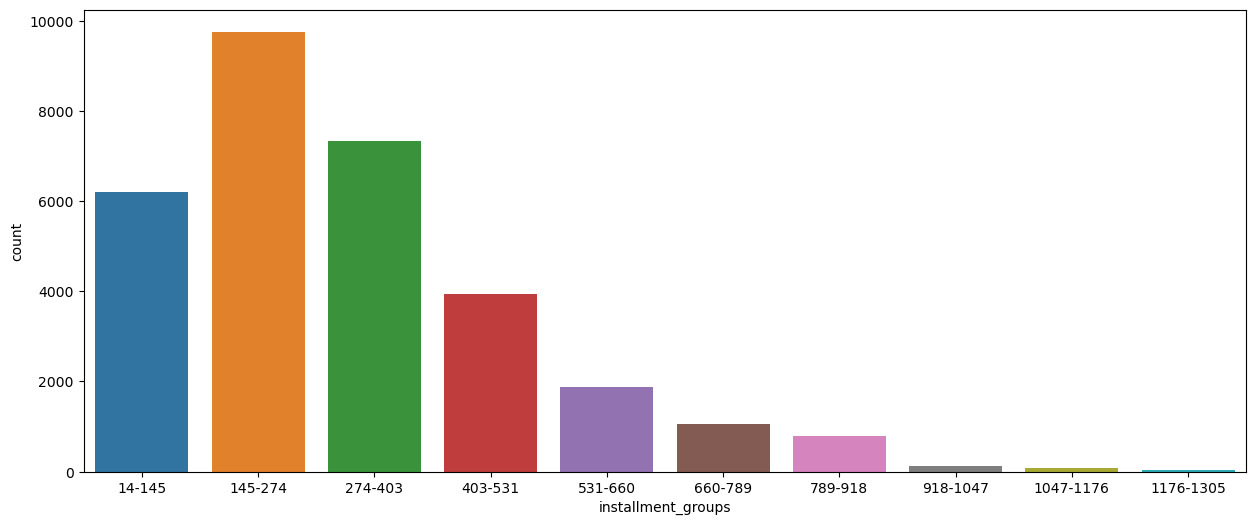

In [113]:
fig,ax = plot.subplots(figsize = (15,6))
sns.countplot(x='installment_groups', data=df[df.loan_status==0])

<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

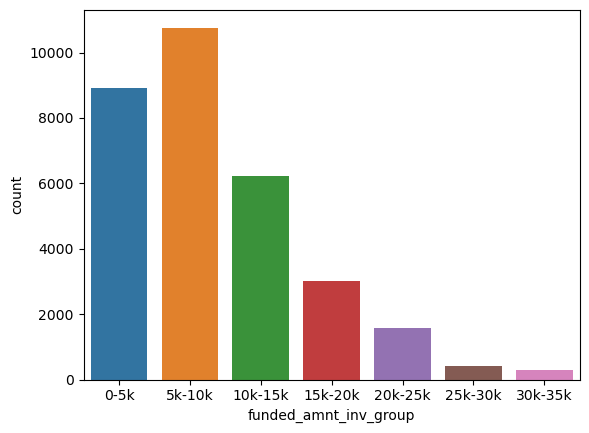

In [114]:
sns.countplot(x='funded_amnt_inv_group', data=df[df.loan_status==0])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

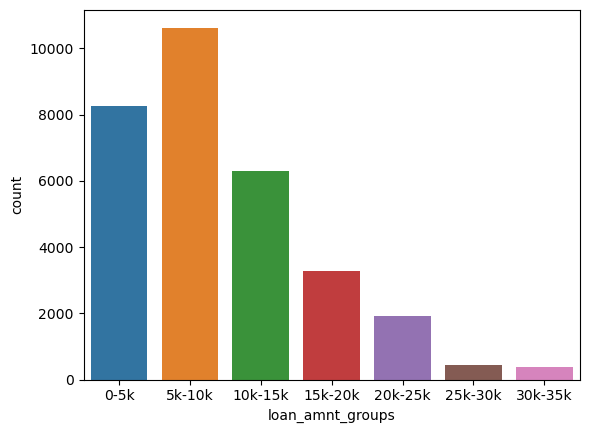

In [115]:
sns.countplot(x='loan_amnt_groups', data=df[df.loan_status==0])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

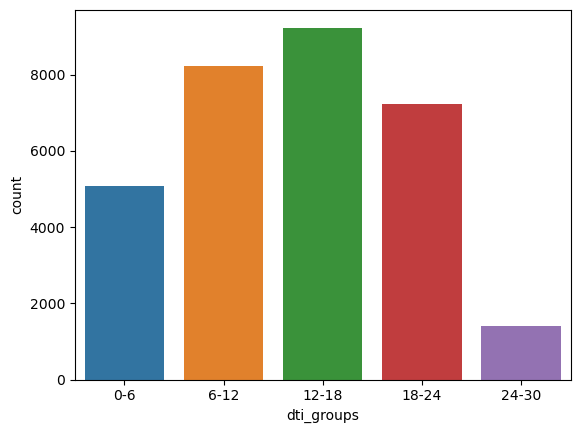

In [117]:
sns.countplot(x='dti_groups', data=df[df.loan_status==0])

### Correlation Analysis

In [168]:
df_corr = df

In [147]:
df_corr = df_corr.drop(columns=['installment_groups', 'funded_amnt_inv_group', 'loan_amnt_groups', 'dti_groups', 'issue_year', 'issue_month', 'total_acc', 'policy_code', 'acc_now_delinq', 'delinq_amnt'])

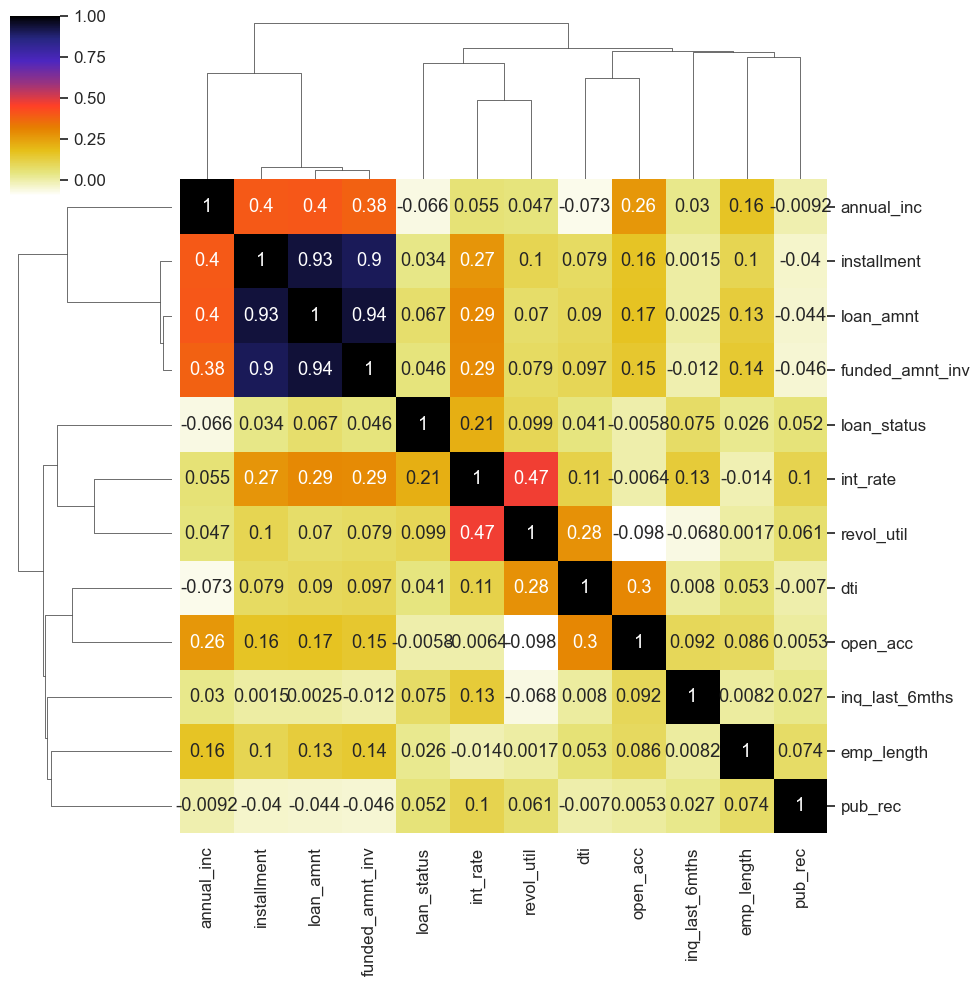

In [148]:
corr = df_corr.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, cmap='CMRmap_r')
plot.show()

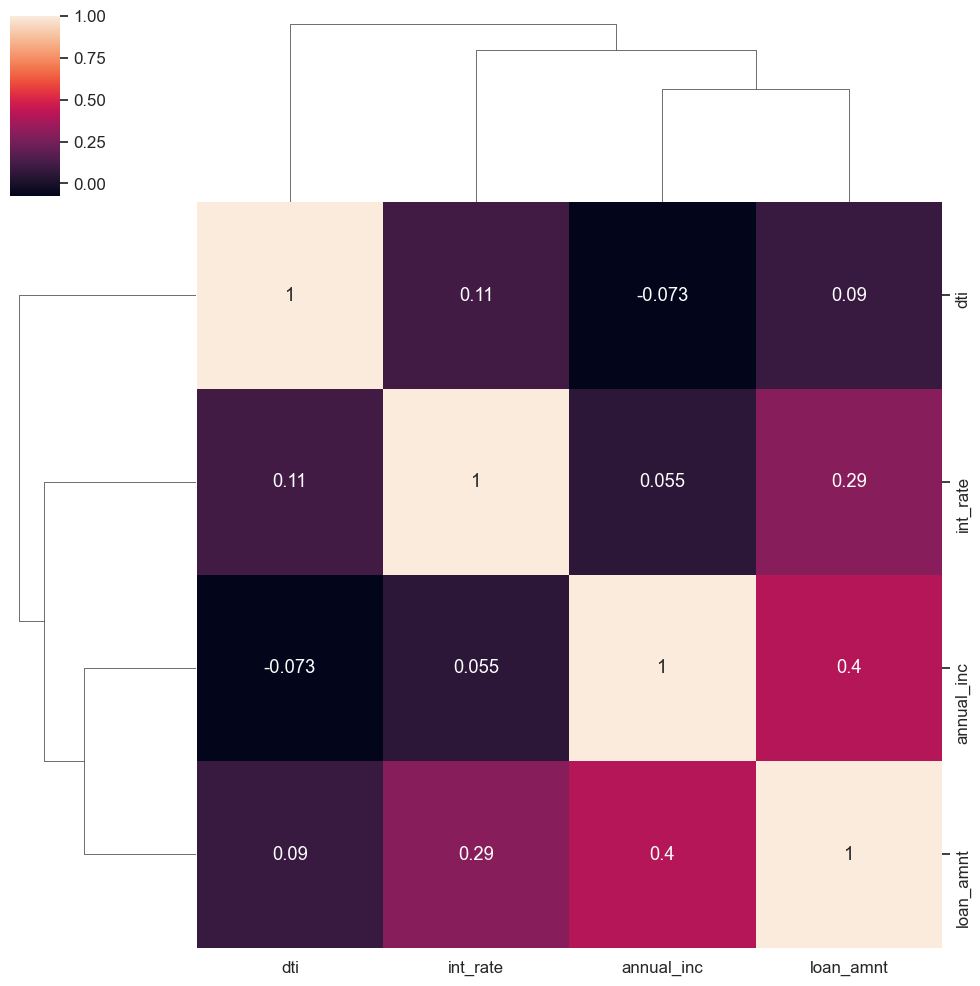

In [156]:
corr = df_corr.loc[:, [ 'annual_inc', 'loan_amnt', 'int_rate', 'dti']].corr()
sns.clustermap(corr, annot=True)
plot.show()

# Bivariate Analysis

### Comparing relevant columns

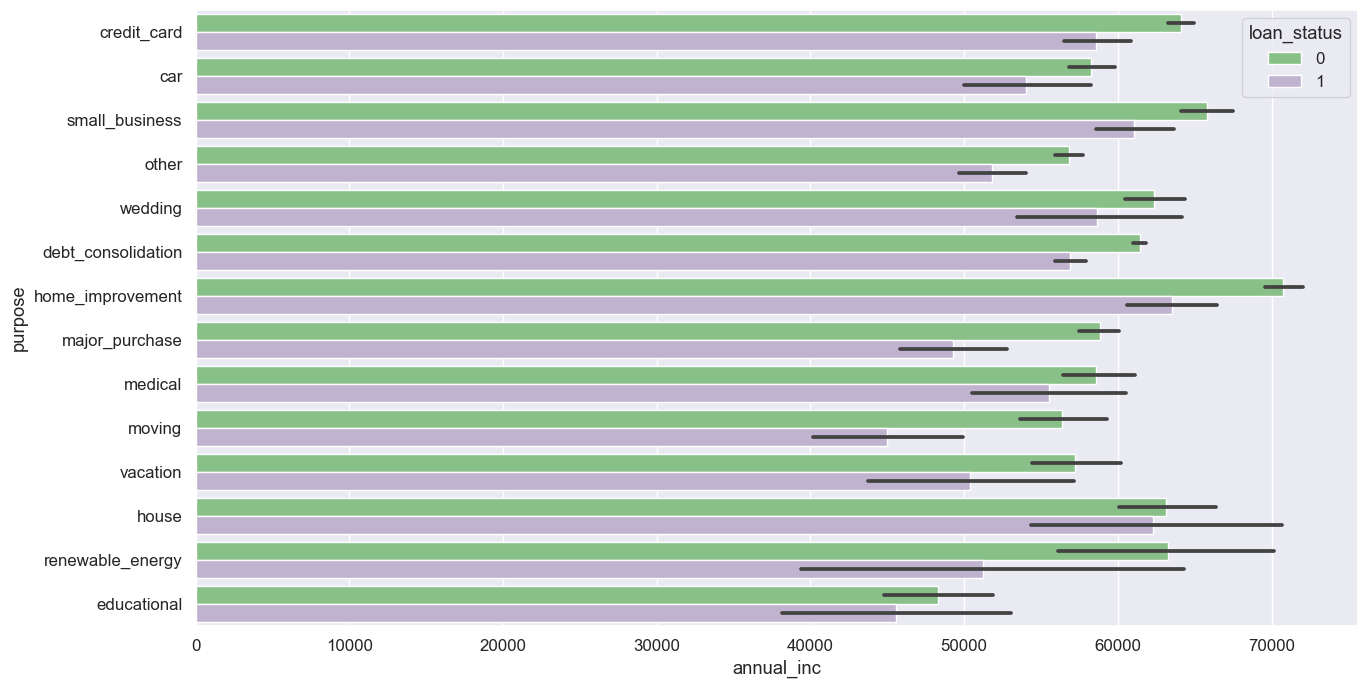

In [166]:
plot.figure(figsize=(15,8))
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status', palette='Accent')
plot.show()

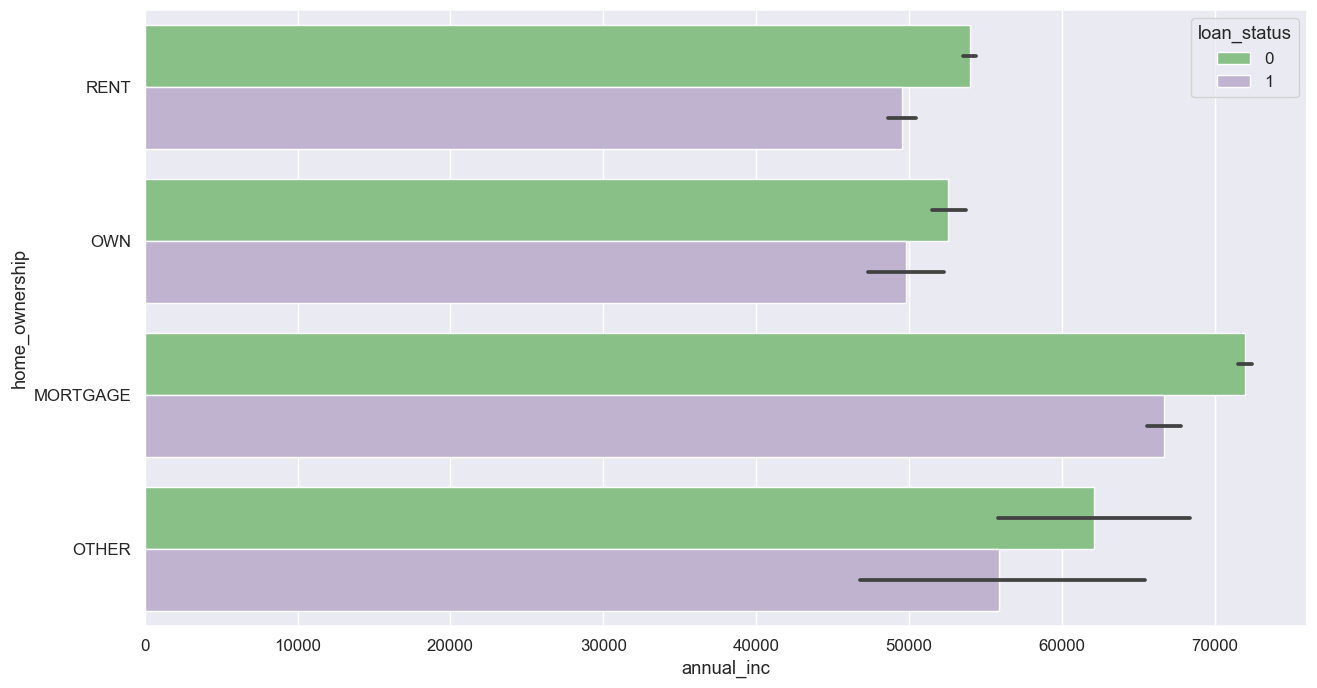

In [167]:
plot.figure(figsize=(15,8))
sns.barplot(data =df,x='annual_inc', y='home_ownership', hue ='loan_status',palette='Accent')
plot.show()

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='loan_amnt'>

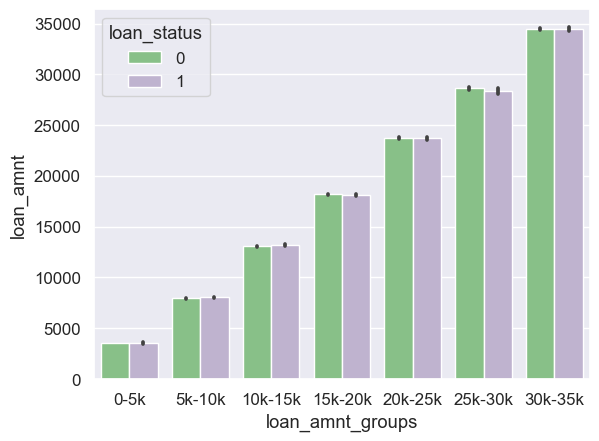

In [169]:
sns.barplot(data =df,x='loan_amnt_groups', y='loan_amnt', hue ='loan_status',palette='Accent')

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='int_rate'>

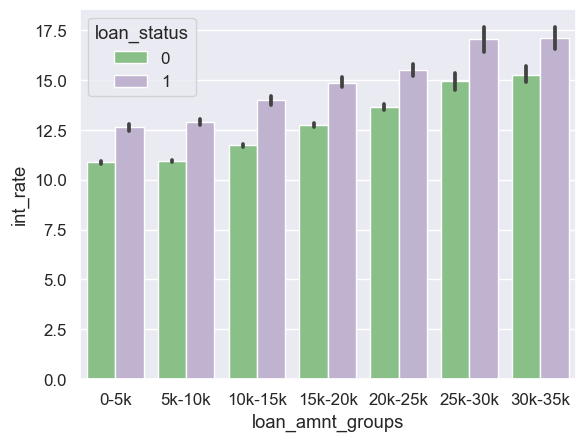

In [174]:
sns.barplot(data =df,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette='Accent')

<AxesSubplot:xlabel='loan_amnt', ylabel='home_ownership'>

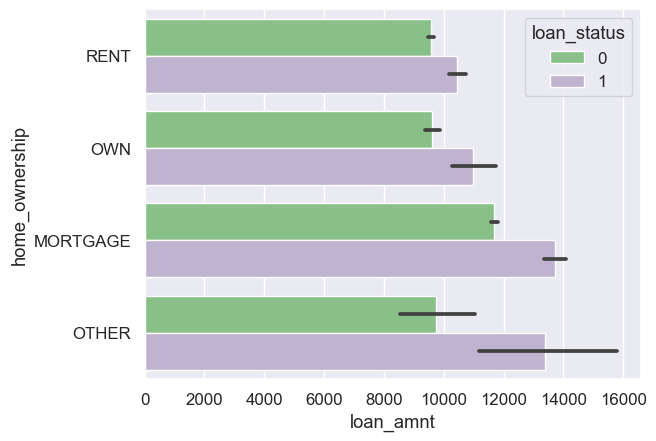

In [175]:
sns.barplot(data =df,x='loan_amnt', y='home_ownership', hue ='loan_status',palette='Accent')

<AxesSubplot:xlabel='issue_year', ylabel='loan_amnt'>

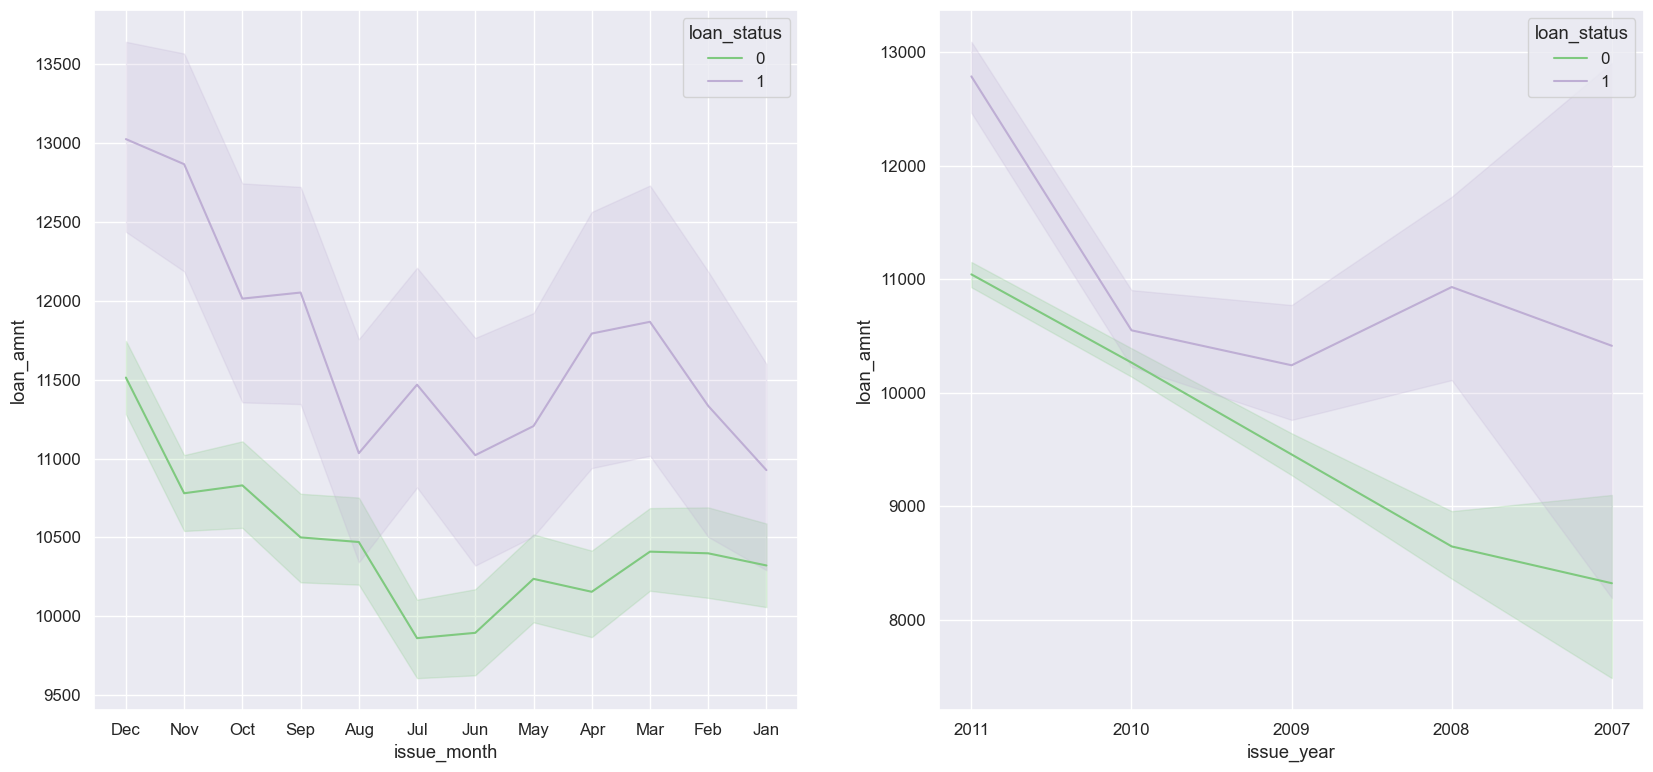

In [179]:
plot.figure(figsize=(20,20))
plot.subplot(221)
sns.lineplot(data =df,y='loan_amnt', x='issue_month', hue ='loan_status',palette='Accent')
plot.subplot(222)
sns.lineplot(data =df,y='loan_amnt', x='issue_year', hue ='loan_status',palette='Accent')

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

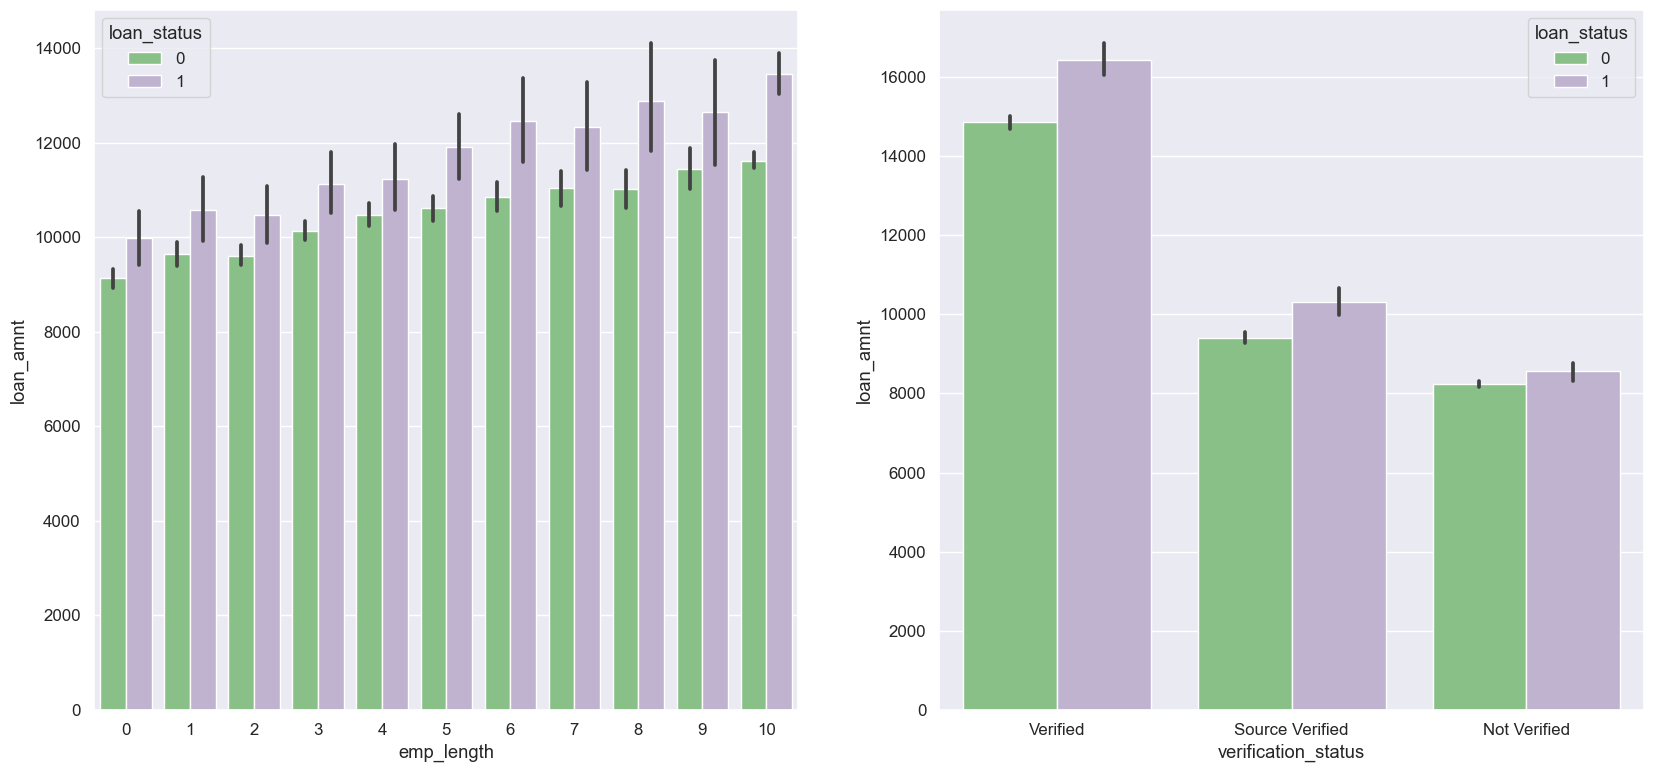

In [180]:
plot.figure(figsize=(20,20))
plot.subplot(221)
sns.barplot(data =df,y='loan_amnt', x='emp_length', hue ='loan_status',palette='Accent')
plot.subplot(222)
sns.barplot(data =df,y='loan_amnt', x='verification_status', hue ='loan_status',palette='Accent')

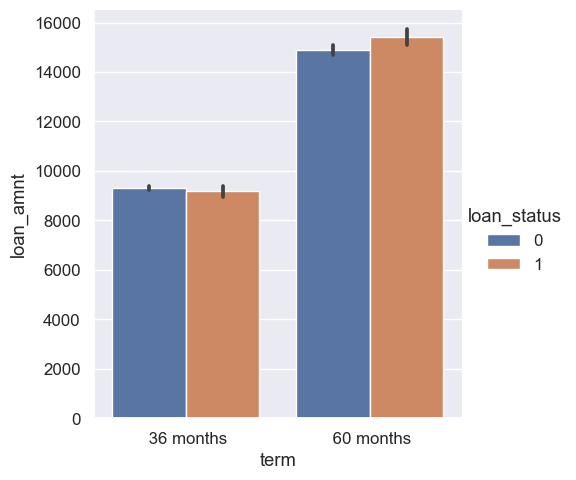

In [181]:
sns.catplot(x = 'term', y = 'loan_amnt', data = df,hue = 'loan_status', kind = 'bar')